# Image Classification (MNIST DATASET)

## Library

In [116]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import time

## DataSet

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [118]:
train_images.shape

(60000, 28, 28)

In [119]:
train_labels.shape

(60000,)

In [120]:
test_images.shape

(10000, 28, 28)

In [121]:
test_labels[9999]

5

In [122]:
print(set(train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [123]:
train_images[10].shape

(28, 28)

## Data Normalization

In [124]:
train_images=train_images/255
test_images=test_images/255

## Classes of Data

In [125]:
class_names=["T-shirts/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Ploting of Data

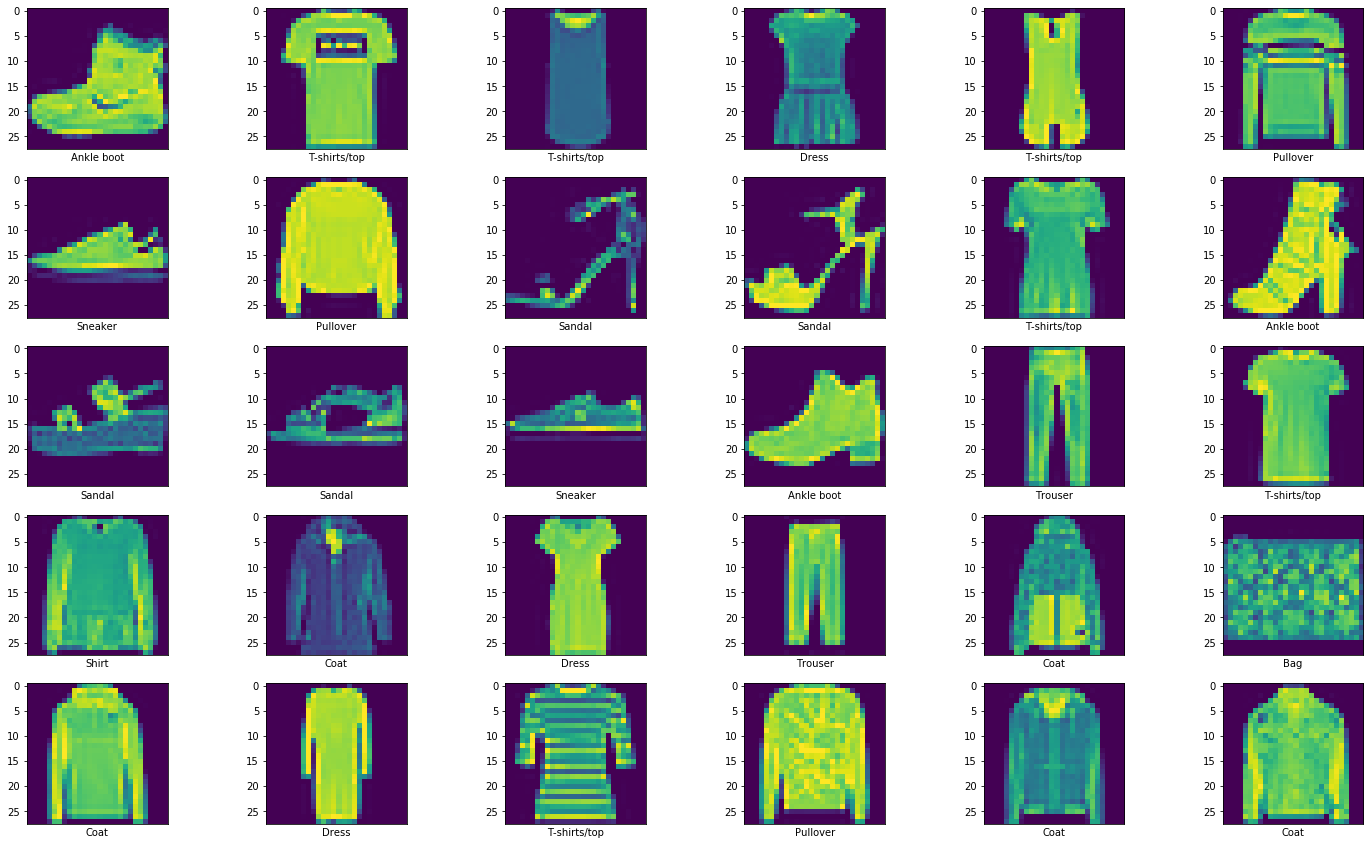

In [126]:
plt.figure(figsize=(25,15))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Validation Set

In [127]:
validation_images=train_images[:5000]
validation_labels=train_labels[:5000]

In [128]:
class_names[train_labels[52]]

'Sneaker'

## Multi Layer Perceptron

In [129]:
#MLP with three hidden layes 
model=keras.models.Sequential([
                                            keras.layers.Flatten(input_shape=[28,28]),
                                            keras.layers.Dense(500,activation=keras.activations.relu),
                                            keras.layers.Dense(250,activation=keras.activations.relu),
                                            keras.layers.Dense(100,activation=keras.activations.relu),
                                            keras.layers.Dense(10,activation=keras.activations.softmax)
])

In [130]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_13 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               25100     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 543,860
Trainable params: 543,860
Non-trainable params: 0
_________________________________________________________________


## Basic Information about Hidden Layer

In [131]:
first_hidden_layer=model.layers[1]
weights,biases=first_hidden_layer.weights
print(weights)
print('******************************')
print('******************************')
print(biases)

<tf.Variable 'dense_12_1/kernel:0' shape=(784, 500) dtype=float32, numpy=
array([[-0.05026638, -0.05576107,  0.03869651, ...,  0.01672247,
        -0.02323957,  0.00056271],
       [-0.03020851,  0.03288671, -0.04527497, ...,  0.04373034,
         0.05834565, -0.04730825],
       [-0.04247181,  0.00232283, -0.0454597 , ...,  0.04071084,
         0.00189862,  0.06499455],
       ...,
       [-0.02788263, -0.06190626,  0.01125486, ...,  0.05263934,
         0.01947773, -0.03092047],
       [ 0.01759882, -0.01635857, -0.01548549, ..., -0.00120246,
        -0.01780443,  0.01867751],
       [ 0.06156022, -0.01670823,  0.0527465 , ...,  0.06570259,
         0.01823492,  0.02759523]], dtype=float32)>
******************************
******************************
<tf.Variable 'dense_12_1/bias:0' shape=(500,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.

## Compilation of Model

In [154]:
# Change learning_rate to get more accuracy            learning_rate is a hyperparameter

sgd=keras.optimizers.SGD(lr=0.01,decay=1*np.exp(-6),momentum=0.9,nesterov=True)
model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd, metrics=['accuracy'])

## Training of model                     

In [153]:
#change no. of epoch to get more accuracy

model.fit(train_images,train_labels,epochs=1,validation_data=(validation_images,validation_labels))

Train on 60000 samples, validate on 5000 samples
60000/60000 [==============================] - 9s 149us/sample - loss: 0.3540 - accuracy: 0.8722 - val_loss: 0.3262 - val_accuracy: 0.8846


## Evaluation on test Data

In [134]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.4216 - accuracy: 0.8477


[0.42158940651416776, 0.8477]

## Probability of occurance

In [135]:
practical_test_images=test_images[:5]
prediction_probabilities=model.predict(practical_test_images)
prediction_probabilities

array([[9.50346202e-06, 9.62929698e-06, 4.42608325e-06, 1.36452372e-05,
        1.81095197e-06, 1.15708604e-01, 1.29258478e-04, 1.01022214e-01,
        1.10743148e-03, 7.81993449e-01],
       [3.27068177e-04, 4.46488457e-06, 9.27822471e-01, 1.38808100e-05,
        4.04952094e-03, 3.06375455e-06, 6.77417964e-02, 5.01613950e-09,
        3.75591226e-05, 2.30306568e-07],
       [3.11093681e-05, 9.99907136e-01, 5.17437729e-06, 3.98456868e-05,
        1.59814481e-05, 4.22369517e-08, 1.95273188e-07, 1.93325363e-07,
        2.71767760e-07, 1.12876339e-08],
       [1.56291881e-05, 9.99795616e-01, 9.37372624e-06, 1.58894516e-04,
        1.86552716e-05, 1.84961891e-07, 2.31420998e-07, 1.11023394e-06,
        2.66739875e-07, 1.19011872e-07],
       [8.25156420e-02, 1.25849317e-03, 1.88445687e-01, 1.61798820e-02,
        1.75810922e-02, 3.82175262e-04, 6.82384431e-01, 4.22728554e-05,
        1.07450373e-02, 4.65265388e-04]], dtype=float32)

## Finding label on test Data

In [143]:
def derive_predicted_class(prediction_probabilities):
    batch_prediction=[]
    for i in prediction_probabilities:
        batch_prediction.append(np.argmax(i))
    return batch_prediction
model_prediction=derive_predicted_class(prediction_probabilities)
model_prediction

[9, 2, 1, 1, 6]

In [144]:
model_prediction=model.predict_classes(practical_test_images)
model_prediction

array([9, 2, 1, 1, 6], dtype=int64)

## Find Class Name

In [145]:
np.array(class_names)[model_prediction]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U12')

## Visualization on test Data

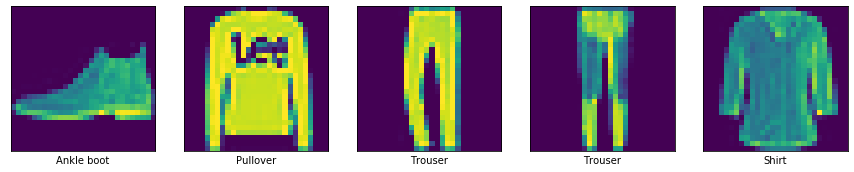

In [146]:
plt.figure(figsize=(15,10))
for i in range(len(practical_test_images)):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(practical_test_images[i])
    plt.xlabel(class_names[model_prediction[i]])
plt.show()

In [147]:
#model.save("Image_classification_model.h5")

In [148]:
loded_model=keras.models.load_model("Image_classification_model.h5")
predictions=loded_model.predict_classes(practical_test_images)
print(predictions)

[9 2 1 1 6]


In [149]:
print(np.array(class_names)[predictions])

['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']
